In [2]:
pip install opencv-python


     ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
     ---------------------------------------- 0.1/39.5 MB 4.3 MB/s eta 0:00:10
     ---------------------------------------- 0.3/39.5 MB 3.3 MB/s eta 0:00:12
      --------------------------------------- 0.6/39.5 MB 3.7 MB/s eta 0:00:11
     - -------------------------------------- 1.1/39.5 MB 4.5 MB/s eta 0:00:09
     - -------------------------------------- 1.5/39.5 MB 4.8 MB/s eta 0:00:08
     - -------------------------------------- 1.8/39.5 MB 4.9 MB/s eta 0:00:08
     -- ------------------------------------- 2.3/39.5 MB 5.1 MB/s eta 0:00:08
     -- ------------------------------------- 2.6/39.5 MB 5.3 MB/s eta 0:00:08
     --- ------------------------------------ 3.1/39.5 MB 5.3 MB/s eta 0:00:07
     --- ------------------------------------ 3.4/39.5 MB 5.4 MB/s eta 0:00:07
     --- ------------------------------------ 3.8/39.5 MB 5.4 MB/s eta 0:00:07
     ---- ----------------------------------- 4.4/39.5 MB 


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_path = 'DATASET/TEST'
test_path = 'DATASET/TRAIN'

In [1]:
#importing libraries
#importing libraries
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
#visualisation
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_arr = cv2.imread(file)
        img_arr = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB)
        x_data.append(img_arr)
        y_data.append(category)
data = pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 1112/1112 [00:20<00:00, 53.33it/s]


In [7]:
data.shape

(2513, 2)

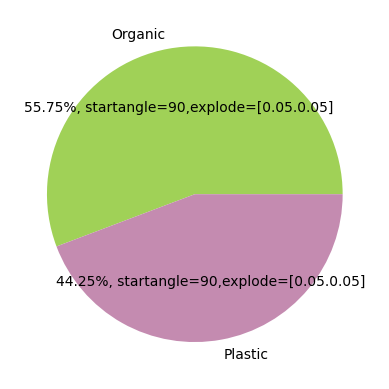

In [10]:
colors = ['#a0d157', '#c48bb0']
plt.pie(data.label.value_counts(), labels=['Organic','Plastic'], colors=colors, autopct='%.2f%%', startangle=90,explode=[0.05.0.05])
plt.show()